In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd

import os
import math
import time
import random
import string

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

#for storing the model
import pickle

# Below libraries are for text processing using NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Below libraries are for similarity matrices using sklearn
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances

from sklearn.decomposition import LatentDirichletAllocation

from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load data

In [35]:
news_articles_og = pd.read_json("/content/drive/MyDrive/IR Project - Group 49/Dataset/News_Category_Dataset_v2.json", lines = True) # snehal
# news_articles_og = pd.read_pickle('/content/drive/MyDrive/IR Project - Group 49/NewsData/NewsData_07_04') # shambhavi

In [36]:
# loading data from all the files 

files = os.listdir('/content/drive/MyDrive/IR Project - Group 49/NewsData') # snehal
path = '/content/drive/MyDrive/IR Project - Group 49/NewsData/'

# files = os.listdir('/content/drive/MyDrive/NewsData/') # shambhavi
# path = '/content/drive/MyDrive/NewsData/'

news_articles_og = pd.DataFrame()
temp = []
for file in files:
  file_path = path + file
  temp.append(pd.read_pickle(file_path))

news_articles_og = pd.concat(temp)


In [37]:
news_articles_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 89
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   short_description  1170 non-null   object
 1   link               1170 non-null   object
 2   headlines          1170 non-null   object
 3   category           1170 non-null   object
dtypes: object(4)
memory usage: 45.7+ KB


In [38]:
news_articles_og.describe()

,short_description,link,headlines,category
count,1170,1170,1170,1170
unique,760,753,760,7
top,Designer Law Roach has denied rumours of any s...,https://www.bollywoodhungama.com/amp/news/feat...,She's my little sister: Law Roach on fall out ...,POLITICS
freq,8,8,8,260


In [39]:
news_articles_og.head()

,short_description,link,headlines,category
0,Uorfi Javed criticised Sonali Kulkarni for her...,https://www.freepressjournal.in/amp/entertainm...,How insensitive: Uorfi on Sonali's 'many girls...,ENTERTAINMENT
1,Shakti Arora spoke about quitting the show 'Ku...,https://www.hindustantimes.com/entertainment/t...,Didn't want to play father to 28-yr-old: Shakt...,ENTERTAINMENT
2,"'Naatu Naatu' singer Kaala Bhairava, who misse...",https://twitter.com/kaalabhairava7/status/1636...,Singer Kaala Bhairava apologises for not thank...,ENTERTAINMENT
3,The makers of Ishaan Khatter and Mrunal Thakur...,https://indianexpress.com/article/entertainmen...,Makers of 'Pippa' refute reports of film's dir...,ENTERTAINMENT
4,"Guneet Monga, the producer of Oscar-winning do...",https://www.news18.com/amp/movies/guneet-monga...,India's moment taken away: Guneet Monga on not...,ENTERTAINMENT


In [40]:
news_articles_og.head()

,short_description,link,headlines,category
0,Uorfi Javed criticised Sonali Kulkarni for her...,https://www.freepressjournal.in/amp/entertainm...,How insensitive: Uorfi on Sonali's 'many girls...,ENTERTAINMENT
1,Shakti Arora spoke about quitting the show 'Ku...,https://www.hindustantimes.com/entertainment/t...,Didn't want to play father to 28-yr-old: Shakt...,ENTERTAINMENT
2,"'Naatu Naatu' singer Kaala Bhairava, who misse...",https://twitter.com/kaalabhairava7/status/1636...,Singer Kaala Bhairava apologises for not thank...,ENTERTAINMENT
3,The makers of Ishaan Khatter and Mrunal Thakur...,https://indianexpress.com/article/entertainmen...,Makers of 'Pippa' refute reports of film's dir...,ENTERTAINMENT
4,"Guneet Monga, the producer of Oscar-winning do...",https://www.news18.com/amp/movies/guneet-monga...,India's moment taken away: Guneet Monga on not...,ENTERTAINMENT


In [41]:
print(news_articles_og.nunique())

short_description    760
link                 753
headlines            760
category               7
dtype: int64


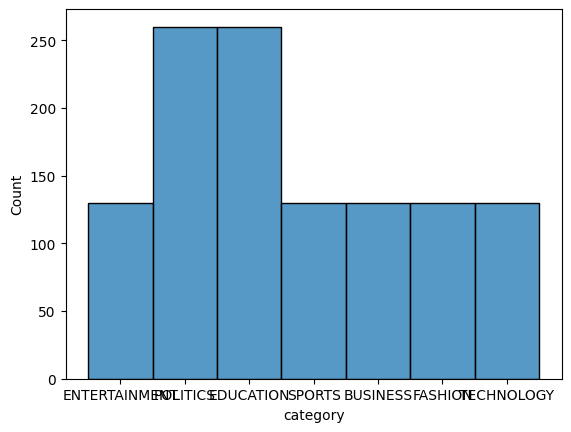

In [42]:

sns.histplot(news_articles_og.category)
plt.show()

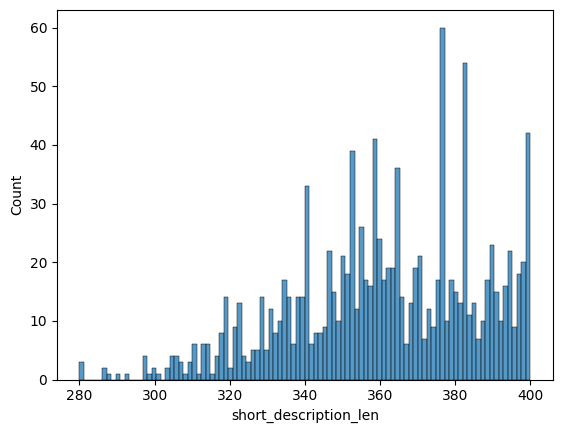

In [46]:
news_articles = news_articles_og
news_articles["short_description_len"] = news_articles_og.short_description.apply(lambda x: len(x))
sns.histplot(news_articles.short_description_len, bins=100)
plt.show()

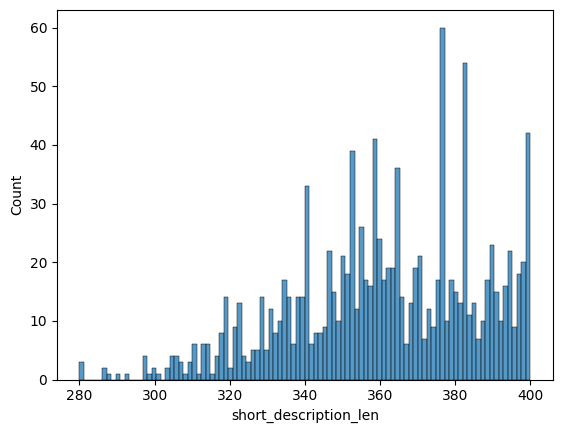

In [47]:
news_articles["headlines"] = news_articles_og.headlines.apply(lambda x: len(x))
sns.histplot(news_articles.short_description_len, bins=100)
plt.show()